# PHAS1240 Session 6:
# Plotting a square wave using Fourier series with varying number of terms

Fahad Chohan
Last updated: 16/11/15

In this task I am plotting a Square wave using a Fourier series with a different number of terms in the series

<div class="alert alert-success">
<h2> The task: </h2>
<br>
This is a template for the session 6 Fourier Square Wave task. Your job is to fill in the blanks in the code and add text cells where needed. 
<br>
All the instructions for the task are in green text cells like this one. You can keep these cells in your submitted workbook if you want, but they will be ignored by the markers.
<br>
You will be graded on your completed code, and the text cells that you add yourself.

</div>

<div class="alert alert-success">
Replace the title/header of this notebook with your own title, and include a suitable introduction (you can leave this until the end, but don't forget!)

<br>
Complete the cell below to import the functions you will need in order to be able to use the same interactive functions you saw in the script.
<div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.html.widgets import interactive 
from IPython.display import display

%matplotlib inline

plt.rcParams['figure.figsize'] = 9, 6



:0: FutureWarning: IPython widgets are experimental and may change in the future.


<div class="alert alert-success">
The code cell below defines our initial data. A value for $L$, the period of the function, has already been set. Add a line that will create an array, named `x`, of values to use for the x-values for the plot from 0 to $5\pi$, with an appropriate number of points to result in a smooth function on the plot (you can come back and adjust this later).
<div>


In [2]:
#Set up initial data
# period of the function is [−L,L]
L = np.pi

#Setting an array for x values
x = np.linspace(0, 5 * np.pi, 1000)

<div class="alert alert-success">
The code cell below contains the start of a function that needs to calculate the Fourier series for a square wave, i.e. it codes the mathematical function
$$f_\text{square}(x) = \frac{4}{\pi} \sum_{n = 1, 3, 5, \ldots}^{\infty} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right) \qquad \qquad (1)$$ 
for all $n$ up to and including $n = $ <tt>n_terms</tt>. The docstring has already been written for you.

<ul>
<li>
Complete the function to calculate the Fourier series for the number of terms <tt>n_terms</tt> specified in the function input. </li>
<li>Don't change any of the variable names. </li>
<li>Use a new text cell, as well as appropriate code comments, to describe your function.</li>
</ul>

<b> Note:</b> Here the variable <tt>L</tt> will act as a _global_ variable. It is defined in the cell above, and when you reference <tt>L</tt> in your function it will use that value of <tt>L</tt>, without having to explicitly pass it to the function. In other words, you don't need to redefine <tt>L</tt> within your function.

<b> HINT:</b> You will need to use the same kind of looping structure that you used in session 2 to calculate $\pi/4$. Think carefully about the differences and similarities between that sum and this one.
<div>


Here I am defining a function for a fourier series in order to plot a square wave.
First I have defined fourier as 0 and n as 0. Then I have made the loop for the series with n_terms in the series. Note that the value of n goes up in 2 from n = 1 because only odd values are used.

In [3]:
#Defining function
def fourier_sum(x_values,n_terms):
    '''function that creates the Fourier series for square wave.
    Inputs:
    x_values: array of x-values
    n_terms: maximum value of n in summation from eqn(1) above
    Returns:
    fourier: array of y-values for Fourier square wave
    '''
    
    fourier = 0.0
    n=1.0
    
    while n <= n_terms:
        fourier = fourier + (4/np.pi) * (1.0/n) * np.sin(n*np.pi*x_values/L)
        n = n + 2
    return fourier
    

<div class="alert alert-success">
Now you need to write a function that will plot the Fourier series.

The function in the code cell below, when completed, should 
<ul>
<li>call your <tt>fourier_sum</tt> function from above to calculate the Fourier series for the number of terms as given in the input; then</li>
<li> plot it on a suitably labelled graph.</li>
<div>


In [4]:
#Defining function
def plot_fourier(n_terms):
    """function that displays the fourier series for a different number of terms"""
    y = fourier_sum(x,n_terms)
    
    #Plots a blue square wave 
    plt.line, = plt.plot(x, y, linewidth=1, color='b')
    
    #Adds title
    plt.title('Square wave for a fourier series of n terms')
    
    #Shows square wave for an x value up to 5pi
    plt.xlim(0,5*L)
    
    #Adds two red dotted lines at y = 1 and y = -1
    plt.plot([0,5*L],[1,1], 'r:')
    plt.plot([0,5*L],[-1,-1], 'r:')
    
    #Adds a line across x axis
    plt.axhline(linewidth = 1.0, ls=':')
    
    #Labels axis
    plt.xlabel("x")
    plt.ylabel("fourier_sum(x,n)")

Here is a plot of a square wave by using a Fourier series with 10000 terms in the sum.

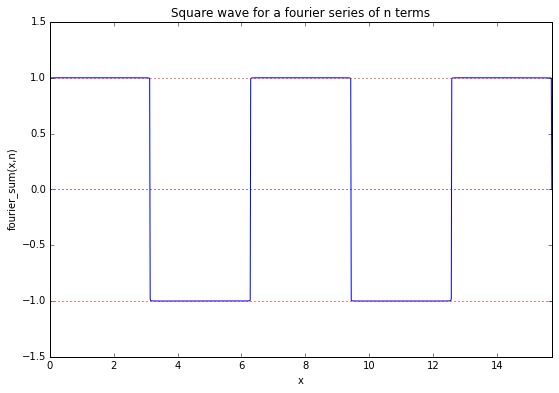

In [5]:
#Calling function
plot_fourier(10000)

<div class="alert alert-success">
Now test that everything is running OK before you attempt to use the interactive slider. Add a single command in the cell below that will call your function to calculate and plot your Fourier series with $n= 3$. Does this look like how you'd expect? If not, go back and adjust your code until it does. Check it with other values of $n$ as well, and make sure you're happy with the results.
<div>


(0, 15.707963267948966)

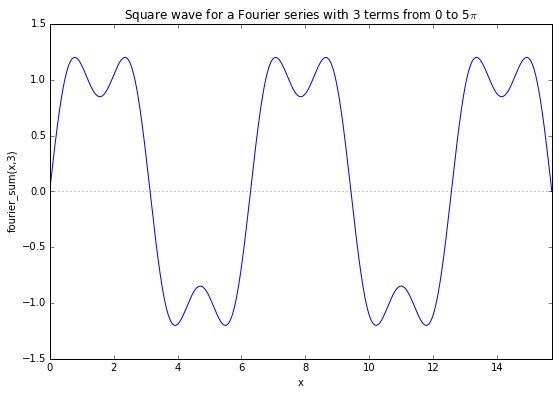

In [6]:
#Array of x data
xpoints = np.linspace(0,5*L,1000) 

#Function to plot
ypoints = fourier_sum(x,3)    

plt.plot(xpoints,ypoints)

#Adds title
plt.title("Square wave for a Fourier series with 3 terms from 0 to 5$\pi$")

#Labels axis
plt.xlabel("x")
plt.ylabel("fourier_sum(x,3)")

#Adds a line across x axis
plt.axhline(linewidth=0.5,ls=':')

#Shows square wave for an x value up to 5pi
plt.xlim(0,5*L)

<div class="alert alert-success">
The final code cell needs to plot your Fourier series with a slider so that you can vary the number of terms in the series and see how the square wave builds up as you move the slider and increase the number of terms in the series. Choose a sensible maximum number of terms.

<br> 
Use a text cell to explain
<ul>
<li> Your choice of maximum number of terms </li>
<li> What is happening when the slider moves from 1$\rightarrow$2,  3$\rightarrow$4, 5$\rightarrow$6 etc.</li>

<div>


In [7]:
def plot_phase(n):
    """function to draw plot based on current slider phase position"""
    y = fourier_sum(x,n) # calculate the y-values based on current phase from slider
    plt.line, = plt.plot(x, y, linewidth=1, color='b') # nb use of comma
    
    #Adds title
    plt.title("Square wave for a Fourier series with n terms from 0 to 5$\pi$")
    
    #Labels axis
    plt.xlabel("x")
    plt.ylabel("fourier_sum(x,n)")

    #Adds a line across x axis
    plt.axhline(linewidth=0.5,ls=':')

    #Shows square wave for an x value up to 5pi
    plt.xlim(0,5*L)
    

Here is a square wave for a fourier series with varying number of terms, there is a slider from n=1 to n=200 included so that it can be seen how the number of terms affect the square wave 

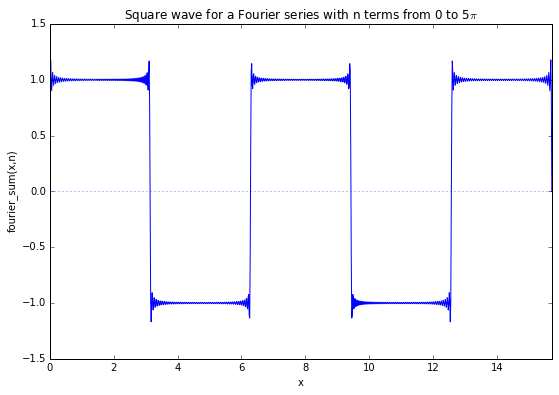

In [8]:
fourier_sum_plot = interactive(plot_phase, n=(1,200,1))
display(fourier_sum_plot)